In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('data_surabaya.xlsx', sheet_name='Surabaya', index_col=0)
df

,Jumlah Penderita,Cakupan DPT1 %,Cakupan DPT2 %,Cakupan DPT3 %,Cakupan DPT4 %,Kepadatan Penduduk (jiwa/km2)
Bulan/Th,,,,,,
2013-01-01,16,7.940000,7.290000,6.980000,0.000000,8007.830858
2013-02-01,9,7.160000,6.890000,6.870000,0.000000,8011.675428
2013-03-01,5,7.210000,7.310000,7.430000,0.000000,8015.521844
2013-04-01,5,7.550000,7.220000,7.370000,0.000000,8019.370107
2013-05-01,6,6.610000,6.210000,6.290000,0.000000,8023.220217
...,...,...,...,...,...,...
2022-08-01,0,9.793725,9.380486,8.892856,29.735357,8380.000000
2022-09-01,0,9.405889,9.325258,8.698423,17.672179,8382.000000
2022-10-01,0,9.412397,9.045279,8.921607,14.226454,8385.000000


In [3]:
df.shape

(120, 6)

In [4]:
df.dtypes

Jumlah Penderita                   int64
Cakupan DPT1 %                   float64
Cakupan DPT2 %                   float64
Cakupan DPT3 %                   float64
Cakupan DPT4 %                   float64
Kepadatan Penduduk (jiwa/km2)    float64
dtype: object

In [5]:
df = df.astype('float64')
df.dtypes

Jumlah Penderita                 float64
Cakupan DPT1 %                   float64
Cakupan DPT2 %                   float64
Cakupan DPT3 %                   float64
Cakupan DPT4 %                   float64
Kepadatan Penduduk (jiwa/km2)    float64
dtype: object

In [6]:
df

,Jumlah Penderita,Cakupan DPT1 %,Cakupan DPT2 %,Cakupan DPT3 %,Cakupan DPT4 %,Kepadatan Penduduk (jiwa/km2)
Bulan/Th,,,,,,
2013-01-01,16.0,7.940000,7.290000,6.980000,0.000000,8007.830858
2013-02-01,9.0,7.160000,6.890000,6.870000,0.000000,8011.675428
2013-03-01,5.0,7.210000,7.310000,7.430000,0.000000,8015.521844
2013-04-01,5.0,7.550000,7.220000,7.370000,0.000000,8019.370107
2013-05-01,6.0,6.610000,6.210000,6.290000,0.000000,8023.220217
...,...,...,...,...,...,...
2022-08-01,0.0,9.793725,9.380486,8.892856,29.735357,8380.000000
2022-09-01,0.0,9.405889,9.325258,8.698423,17.672179,8382.000000
2022-10-01,0.0,9.412397,9.045279,8.921607,14.226454,8385.000000


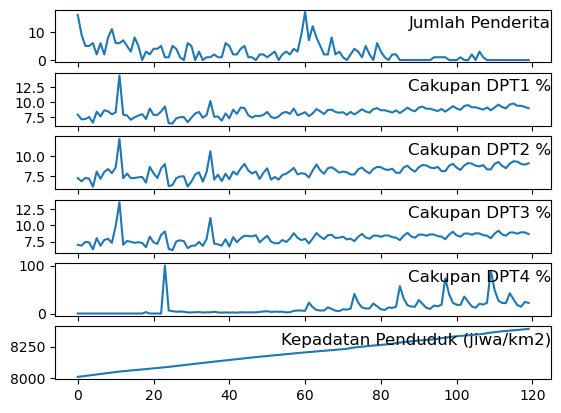

In [7]:
from matplotlib import pyplot as plt
# load dataset
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure()
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:, group])
 plt.title(df.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

In [8]:
# prepare data for lstm
from pandas import DataFrame
from pandas import concat
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  data = DataFrame(data, columns=df.columns, index=df.index)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(data.shift(i))
    names += [('%s(t-%d)' % (j, i)) for j in df.columns]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(data.shift(-i))
    if i == 0:
      names += [('%s(t)' % (j)) for j in df.columns]
    else:
      names += [('%s(t+%d)' % (j, i)) for j in df.columns]
  # put it all together
  agg = concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [10]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
date_range = pd.date_range(start='2013-02-01', end='2022-12-01', freq='MS')
reframed.set_index(date_range, inplace=True)
reframed

,Jumlah Penderita(t-1),Cakupan DPT1 %(t-1),Cakupan DPT2 %(t-1),Cakupan DPT3 %(t-1),Cakupan DPT4 %(t-1),Kepadatan Penduduk (jiwa/km2)(t-1),Jumlah Penderita(t),Cakupan DPT1 %(t),Cakupan DPT2 %(t),Cakupan DPT3 %(t),Cakupan DPT4 %(t),Kepadatan Penduduk (jiwa/km2)(t)
2013-02-01,0.941176,0.183417,0.181208,0.109756,0.000000,0.000000,0.529412,0.085427,0.114094,0.094851,0.000000,0.010034
2013-03-01,0.529412,0.085427,0.114094,0.094851,0.000000,0.010034,0.294118,0.091709,0.184564,0.170732,0.000000,0.020072
2013-04-01,0.294118,0.091709,0.184564,0.170732,0.000000,0.020072,0.294118,0.134422,0.169463,0.162602,0.000000,0.030115
2013-05-01,0.294118,0.134422,0.169463,0.162602,0.000000,0.030115,0.352941,0.016332,0.000000,0.016260,0.000000,0.040163
2013-06-01,0.352941,0.016332,0.000000,0.016260,0.000000,0.040163,0.117647,0.243719,0.317114,0.250678,0.000000,0.050216
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.000000,0.394605,0.482799,0.367272,0.423541,0.963463,0.000000,0.416297,0.531961,0.368951,0.297354,0.971292
2022-09-01,0.000000,0.416297,0.531961,0.368951,0.297354,0.971292,0.000000,0.367574,0.522694,0.342605,0.176722,0.976512
2022-10-01,0.000000,0.367574,0.522694,0.342605,0.176722,0.976512,0.000000,0.368392,0.475718,0.372846,0.142265,0.984341
2022-11-01,0.000000,0.368392,0.475718,0.372846,0.142265,0.984341,0.000000,0.342779,0.461123,0.369818,0.242155,0.992171


In [11]:
# drop columns we don't want to predict
df_supervised = reframed.drop(reframed.columns[range(1, 6)], axis=1)
df_supervised = df_supervised[['Jumlah Penderita(t-1)', 'Cakupan DPT1 %(t)', 'Cakupan DPT2 %(t)', 'Cakupan DPT3 %(t)', 'Cakupan DPT4 %(t)', 'Kepadatan Penduduk (jiwa/km2)(t)', 'Jumlah Penderita(t)']]
df_supervised

,Jumlah Penderita(t-1),Cakupan DPT1 %(t),Cakupan DPT2 %(t),Cakupan DPT3 %(t),Cakupan DPT4 %(t),Kepadatan Penduduk (jiwa/km2)(t),Jumlah Penderita(t)
2013-02-01,0.941176,0.085427,0.114094,0.094851,0.000000,0.010034,0.529412
2013-03-01,0.529412,0.091709,0.184564,0.170732,0.000000,0.020072,0.294118
2013-04-01,0.294118,0.134422,0.169463,0.162602,0.000000,0.030115,0.294118
2013-05-01,0.294118,0.016332,0.000000,0.016260,0.000000,0.040163,0.352941
2013-06-01,0.352941,0.243719,0.317114,0.250678,0.000000,0.050216,0.117647
...,...,...,...,...,...,...,...
2022-08-01,0.000000,0.416297,0.531961,0.368951,0.297354,0.971292,0.000000
2022-09-01,0.000000,0.367574,0.522694,0.342605,0.176722,0.976512,0.000000
2022-10-01,0.000000,0.368392,0.475718,0.372846,0.142265,0.984341,0.000000
2022-11-01,0.000000,0.342779,0.461123,0.369818,0.242155,0.992171,0.000000


In [12]:
import math
# split into train and test sets
values = df_supervised.values
train = values[:math.ceil(len(values)*0.8), :]
test = values[math.ceil(len(values)*0.8):, :]
# split into input and outputs
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(96, 1, 6) (96,) (23, 1, 6) (23,)


In [19]:
from numpy import concatenate
from numpy import reshape
from math import sqrt
from numpy import array
from numpy import mean
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# root mean squared error or rmse
def measure_rmse(actual, predicted):
  return sqrt(mean_squared_error(actual, predicted))

 # fit a model
def model_fit(config):
  # unpack config
  n_nodes, n_epochs, n_batch, dropout, act_func = config
  # define model
  model = Sequential()
  model.add(SimpleRNN(n_nodes, activation=act_func, return_sequences=True, input_shape=(1, 6)))
  model.add(Dropout(dropout))
  model.add(SimpleRNN(n_nodes, activation=act_func, return_sequences=True))
  model.add(Dropout(dropout))
  model.add(SimpleRNN(n_nodes, activation=act_func, return_sequences=False))
  model.add(Dropout(dropout))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='adam')
  # fit model
  model.fit(X_train, y_train, epochs=n_epochs, batch_size=n_batch, verbose=0)
  return model

# score a model
def fit_evaluate(config):
  # convert config to a key
    key = str(config)
    # fit and evaluate the model
    model = model_fit(config)
    # make a prediction
    yhat = model.predict(X_test)
    yhat = reshape(yhat, (len(yhat),1))
    X_test_local = X_test.reshape((X_test.shape[0], X_test.shape[2]))
    # invert scaling for forecast
    yhat_inv = concatenate((yhat, X_test_local[:, 1:]), axis=1)
    yhat_inv = scaler.inverse_transform(yhat_inv)
    yhat_inv = yhat_inv[:,0]
    # invert scaling for actual
    y_test_local = y_test.reshape((len(y_test), 1))
    y_inv = concatenate((y_test_local, X_test_local[:, 1:]), axis=1)
    y_inv = scaler.inverse_transform(y_inv)
    y_inv = y_inv[:,0]
    
    r2 = r2_score(y_inv, yhat_inv)
    rmse = measure_rmse(y_inv, yhat_inv)

    print('> Model[%s]. R2 = %.3f. RMSE = %.3f' % (key, r2, rmse))
    return (key, r2, rmse)


# grid search configs
def grid_search(cfg_list):
 # evaluate configs
 scores = [fit_evaluate(cfg) for cfg in cfg_list]
 # sort configs by error, asc
 scores.sort(key=lambda tup: tup[1])
 return scores

def model_configs():
  # define scope of configs
  n_nodes = [50, 100]
  n_epochs = [50, 100]
  n_batch = [6, 12, 24]
  activation_funcs = ['tanh', 'relu']
  dropout_rates = [0.15, 0.3]
  # create configs
  configs = list()
  for j in n_nodes:
    for k in n_epochs:
      for l in n_batch:
        for m in dropout_rates:
          for n in activation_funcs:
            cfg = [j, k, l, m, n]
            configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs

In [20]:
# model configs
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')


Total configs: 48
1/1 [==============================] - 0s 261ms/step
> Model[[50, 50, 6, 0.15, 'tanh']]. R2 = -0.397. RMSE = 0.896
1/1 [==============================] - 0s 280ms/step
> Model[[50, 50, 6, 0.15, 'relu']]. R2 = -0.134. RMSE = 0.807
1/1 [==============================] - 0s 485ms/step
> Model[[50, 50, 6, 0.3, 'tanh']]. R2 = -0.414. RMSE = 0.901
1/1 [==============================] - 0s 242ms/step
> Model[[50, 50, 6, 0.3, 'relu']]. R2 = -0.057. RMSE = 0.779
1/1 [==============================] - 0s 302ms/step
> Model[[50, 50, 12, 0.15, 'tanh']]. R2 = -0.334. RMSE = 0.876
1/1 [==============================] - 0s 251ms/step
> Model[[50, 50, 12, 0.15, 'relu']]. R2 = -0.135. RMSE = 0.808
1/1 [==============================] - 0s 253ms/step
> Model[[50, 50, 12, 0.3, 'tanh']]. R2 = -0.446. RMSE = 0.911
1/1 [==============================] - 0s 466ms/step
> Model[[50, 50, 12, 0.3, 'relu']]. R2 = -1.682. RMSE = 1.241
1/1 [==============================] - 0s 340ms/step
> Model[[

In [21]:
scores_df = pd.DataFrame(scores, columns=['Config', 'R2 Score', 'RMSE'])
scores_df

,Config,R2 Score,RMSE
0,"[50, 100, 12, 0.15, 'tanh']",-1.850309,1.279838
1,"[50, 100, 6, 0.3, 'tanh']",-1.719373,1.250096
2,"[50, 50, 12, 0.3, 'relu']",-1.681749,1.241418
3,"[100, 50, 24, 0.15, 'tanh']",-1.391063,1.172208
4,"[100, 50, 6, 0.3, 'tanh']",-1.232028,1.132554
5,"[100, 50, 12, 0.15, 'tanh']",-1.211645,1.127370
6,"[100, 100, 6, 0.3, 'relu']",-1.117554,1.103129
7,"[100, 100, 6, 0.15, 'tanh']",-0.969984,1.063997
8,"[50, 100, 12, 0.3, 'relu']",-0.942477,1.056542
9,"[50, 100, 24, 0.3, 'relu']",-0.882009,1.039968


In [22]:
scores_df = scores_df.sort_values(['R2 Score'], ascending=False).reset_index(drop=True)
scores_df

,Config,R2 Score,RMSE
0,"[100, 50, 12, 0.3, 'relu']",0.059712,0.735088
1,"[50, 100, 6, 0.15, 'relu']",0.040980,0.742374
2,"[50, 100, 12, 0.15, 'relu']",-0.014169,0.763421
3,"[50, 50, 6, 0.3, 'relu']",-0.056618,0.779234
4,"[100, 100, 6, 0.15, 'relu']",-0.094333,0.793019
5,"[100, 50, 24, 0.15, 'relu']",-0.102526,0.795982
6,"[100, 100, 24, 0.3, 'relu']",-0.109616,0.798538
7,"[100, 50, 12, 0.15, 'relu']",-0.127262,0.804862
8,"[50, 50, 6, 0.15, 'relu']",-0.134076,0.807291
9,"[50, 50, 12, 0.15, 'relu']",-0.135286,0.807721


In [23]:
scores_df['Activation Function'] = scores_df['Config'].apply(lambda x: 'tanh' if 'tanh' in x else 'relu')
scores_df['Nodes'] = scores_df['Config'].apply(lambda x: int(x.split(',')[0].strip('[')))
scores_df['Epochs'] = scores_df['Config'].apply(lambda x: int(x.split(',')[1].strip()))
scores_df['Batch Size'] = scores_df['Config'].apply(lambda x: int(x.split(',')[2].strip()))
scores_df['Dropout'] = scores_df['Config'].apply(lambda x: float(x.split(',')[3].strip()))
scores_df['Activation Function'] = scores_df['Config'].apply(lambda x: x.split(',')[4].strip(']').strip().strip('"'))
scores_df
# Drop the original 'Config' column
# scores_df = df.drop('Config', axis=1)

,Config,R2 Score,RMSE,Activation Function,Nodes,Epochs,Batch Size,Dropout
0,"[100, 50, 12, 0.3, 'relu']",0.059712,0.735088,'relu',100,50,12,0.30
1,"[50, 100, 6, 0.15, 'relu']",0.040980,0.742374,'relu',50,100,6,0.15
2,"[50, 100, 12, 0.15, 'relu']",-0.014169,0.763421,'relu',50,100,12,0.15
3,"[50, 50, 6, 0.3, 'relu']",-0.056618,0.779234,'relu',50,50,6,0.30
4,"[100, 100, 6, 0.15, 'relu']",-0.094333,0.793019,'relu',100,100,6,0.15
5,"[100, 50, 24, 0.15, 'relu']",-0.102526,0.795982,'relu',100,50,24,0.15
6,"[100, 100, 24, 0.3, 'relu']",-0.109616,0.798538,'relu',100,100,24,0.30
7,"[100, 50, 12, 0.15, 'relu']",-0.127262,0.804862,'relu',100,50,12,0.15
8,"[50, 50, 6, 0.15, 'relu']",-0.134076,0.807291,'relu',50,50,6,0.15
9,"[50, 50, 12, 0.15, 'relu']",-0.135286,0.807721,'relu',50,50,12,0.15


In [24]:
column_index = 3
column_name = scores_df.columns[column_index]
column = scores_df.pop(column_name)
scores_df.insert(len(scores_df.columns), column_name, column)
scores_df

,Config,R2 Score,RMSE,Nodes,Epochs,Batch Size,Dropout,Activation Function
0,"[100, 50, 12, 0.3, 'relu']",0.059712,0.735088,100,50,12,0.30,'relu'
1,"[50, 100, 6, 0.15, 'relu']",0.040980,0.742374,50,100,6,0.15,'relu'
2,"[50, 100, 12, 0.15, 'relu']",-0.014169,0.763421,50,100,12,0.15,'relu'
3,"[50, 50, 6, 0.3, 'relu']",-0.056618,0.779234,50,50,6,0.30,'relu'
4,"[100, 100, 6, 0.15, 'relu']",-0.094333,0.793019,100,100,6,0.15,'relu'
5,"[100, 50, 24, 0.15, 'relu']",-0.102526,0.795982,100,50,24,0.15,'relu'
6,"[100, 100, 24, 0.3, 'relu']",-0.109616,0.798538,100,100,24,0.30,'relu'
7,"[100, 50, 12, 0.15, 'relu']",-0.127262,0.804862,100,50,12,0.15,'relu'
8,"[50, 50, 6, 0.15, 'relu']",-0.134076,0.807291,50,50,6,0.15,'relu'
9,"[50, 50, 12, 0.15, 'relu']",-0.135286,0.807721,50,50,12,0.15,'relu'


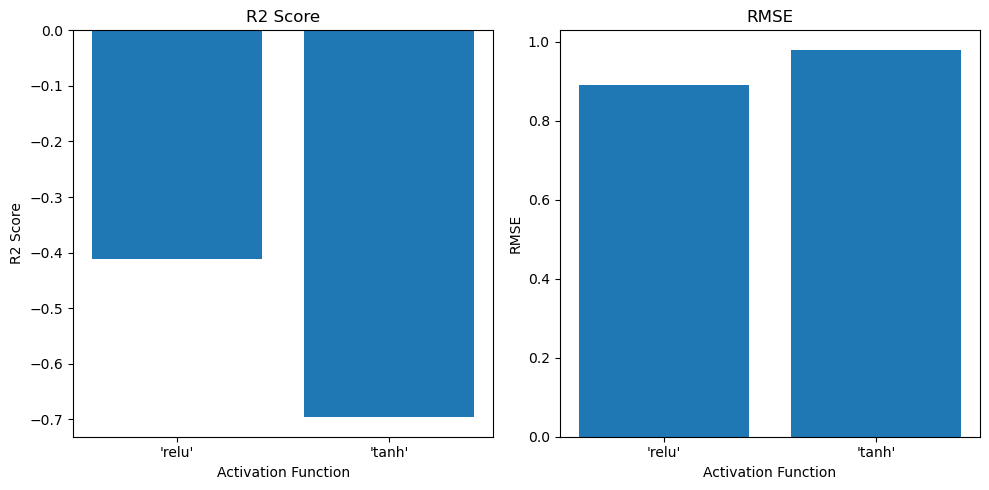

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by activation function
grouped_df = scores_df.groupby('Activation Function').mean().reset_index()

# Create subplots for R2 Score and RMSE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot R2 Score
axes[0].bar(grouped_df['Activation Function'], grouped_df['R2 Score'])
axes[0].set_title('R2 Score')
axes[0].set_xlabel('Activation Function')
axes[0].set_ylabel('R2 Score')

# Plot RMSE
axes[1].bar(grouped_df['Activation Function'], grouped_df['RMSE'])
axes[1].set_title('RMSE')
axes[1].set_xlabel('Activation Function')
axes[1].set_ylabel('RMSE')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [26]:
grouped_df


,Activation Function,R2 Score,RMSE,Nodes,Epochs,Batch Size,Dropout
0,'relu',-0.41083,0.891200,75.0,75.0,14.0,0.225
1,'tanh',-0.69641,0.979321,75.0,75.0,14.0,0.225


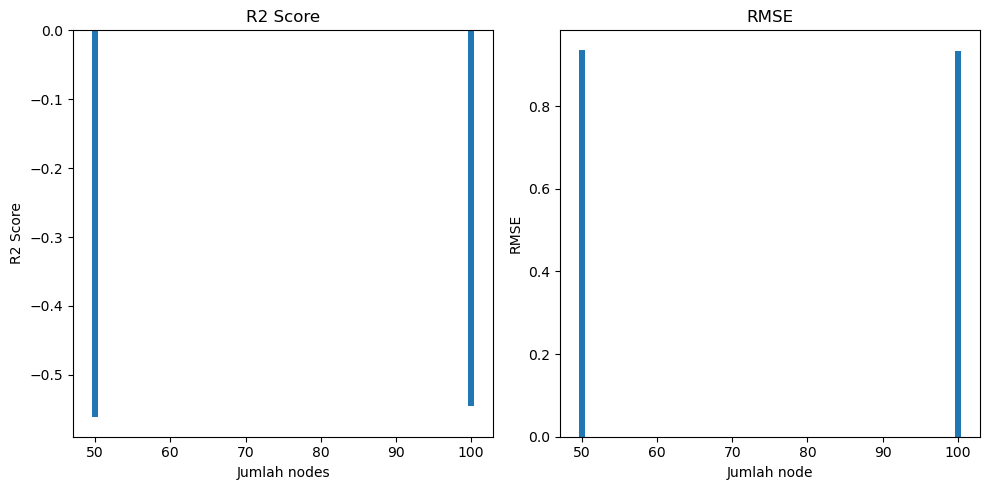

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by activation function
grouped_df = scores_df.groupby('Nodes').mean().reset_index()

# Create subplots for R2 Score and RMSE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot R2 Score
axes[0].bar(grouped_df['Nodes'], grouped_df['R2 Score'])
axes[0].set_title('R2 Score')
axes[0].set_xlabel('Jumlah nodes')
axes[0].set_ylabel('R2 Score')

# Plot RMSE
axes[1].bar(grouped_df['Nodes'], grouped_df['RMSE'])
axes[1].set_title('RMSE')
axes[1].set_xlabel('Jumlah node')
axes[1].set_ylabel('RMSE')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [28]:
grouped_df

,Nodes,R2 Score,RMSE,Epochs,Batch Size,Dropout
0,50,-0.561807,0.936401,75.0,14.0,0.225
1,100,-0.545433,0.934121,75.0,14.0,0.225


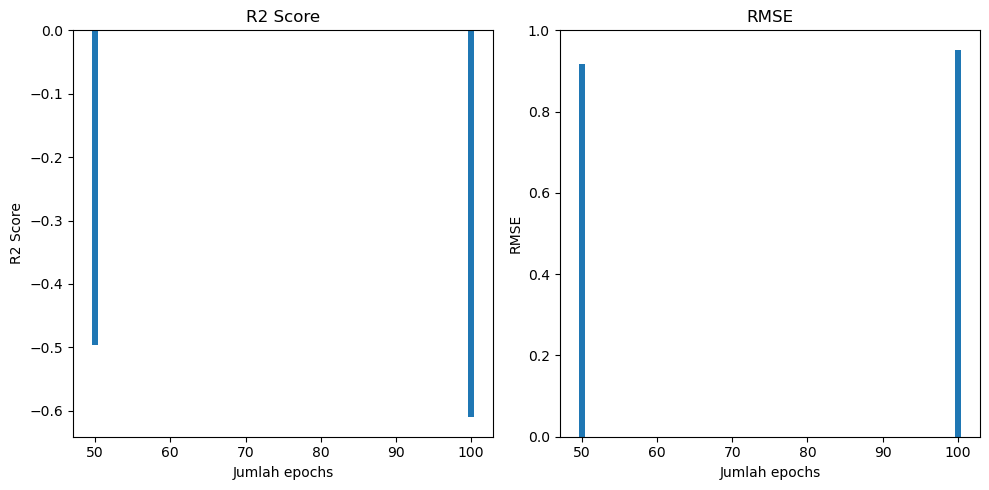

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by activation function
grouped_df = scores_df.groupby('Epochs').mean().reset_index()

# Create subplots for R2 Score and RMSE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot R2 Score
axes[0].bar(grouped_df['Epochs'], grouped_df['R2 Score'])
axes[0].set_title('R2 Score')
axes[0].set_xlabel('Jumlah epochs')
axes[0].set_ylabel('R2 Score')

# Plot RMSE
axes[1].bar(grouped_df['Epochs'], grouped_df['RMSE'])
axes[1].set_title('RMSE')
axes[1].set_xlabel('Jumlah epochs')
axes[1].set_ylabel('RMSE')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [30]:
grouped_df

,Epochs,R2 Score,RMSE,Nodes,Batch Size,Dropout
0,50,-0.496678,0.917981,75.0,14.0,0.225
1,100,-0.610562,0.952541,75.0,14.0,0.225


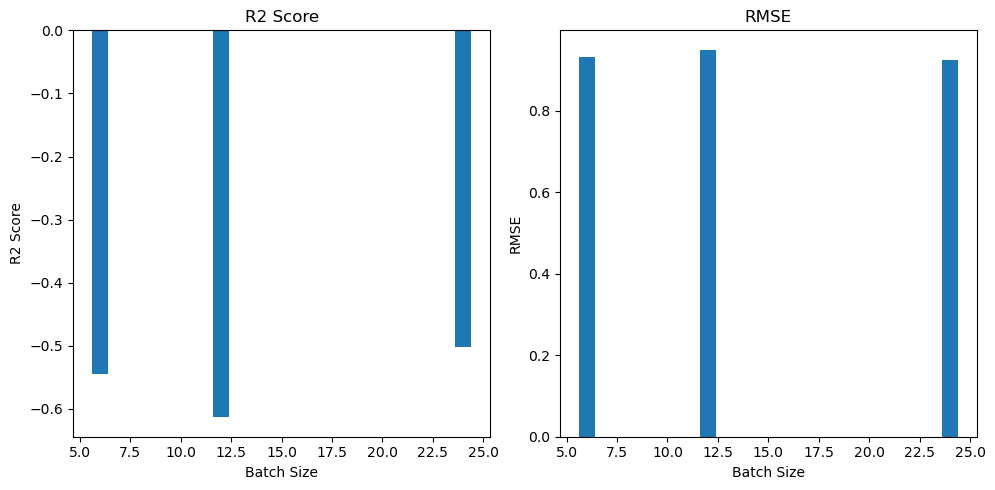

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by activation function
grouped_df = scores_df.groupby('Batch Size').mean().reset_index()

# Create subplots for R2 Score and RMSE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot R2 Score
axes[0].bar(grouped_df['Batch Size'], grouped_df['R2 Score'])
axes[0].set_title('R2 Score')
axes[0].set_xlabel('Batch Size')
axes[0].set_ylabel('R2 Score')

# Plot RMSE
axes[1].bar(grouped_df['Batch Size'], grouped_df['RMSE'])
axes[1].set_title('RMSE')
axes[1].set_xlabel('Batch Size')
axes[1].set_ylabel('RMSE')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [32]:
grouped_df

,Batch Size,R2 Score,RMSE,Nodes,Epochs,Dropout
0,6,-0.544792,0.931736,75.0,75.0,0.225
1,12,-0.613466,0.949768,75.0,75.0,0.225
2,24,-0.502602,0.924279,75.0,75.0,0.225


<AxesSubplot:xlabel='Batch Size'>

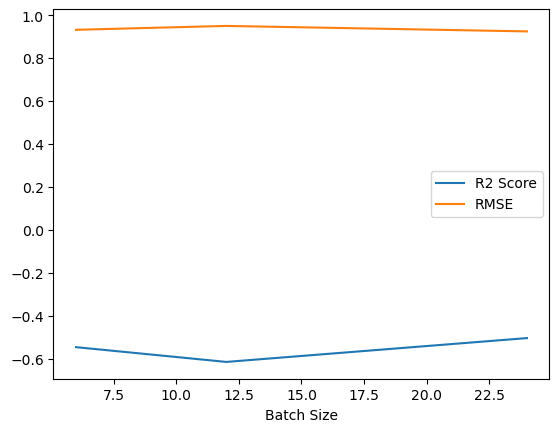

In [33]:
grouped_df.plot(x="Batch Size", y=['R2 Score', 'RMSE'])

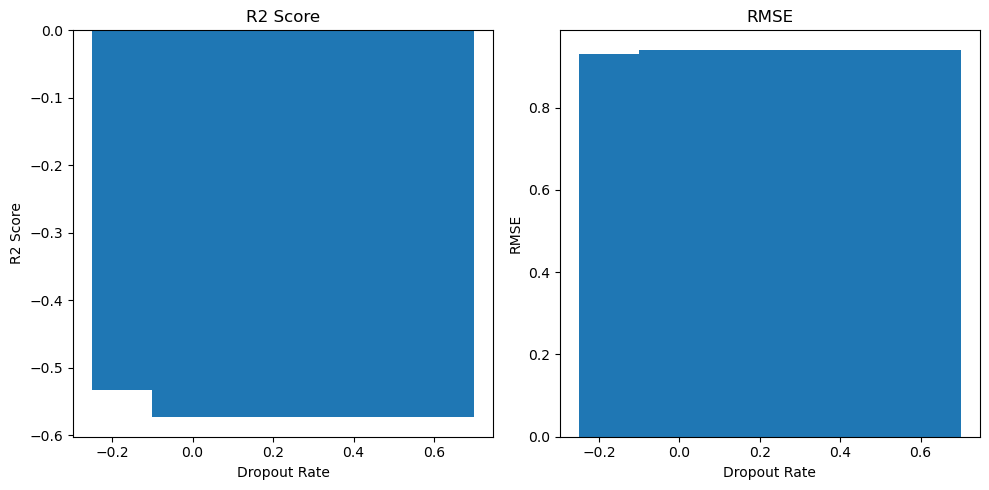

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by activation function
grouped_df = scores_df.groupby('Dropout').mean().reset_index()

# Create subplots for R2 Score and RMSE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot R2 Score
axes[0].bar(grouped_df['Dropout'], grouped_df['R2 Score'])
axes[0].set_title('R2 Score')
axes[0].set_xlabel('Dropout Rate')
axes[0].set_ylabel('R2 Score')

# Plot RMSE
axes[1].bar(grouped_df['Dropout'], grouped_df['RMSE'])
axes[1].set_title('RMSE')
axes[1].set_xlabel('Dropout Rate')
axes[1].set_ylabel('RMSE')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [35]:
grouped_df

,Dropout,R2 Score,RMSE,Nodes,Epochs,Batch Size
0,0.15,-0.533687,0.929539,75.0,75.0,14.0
1,0.30,-0.573553,0.940983,75.0,75.0,14.0


<AxesSubplot:xlabel='Dropout'>

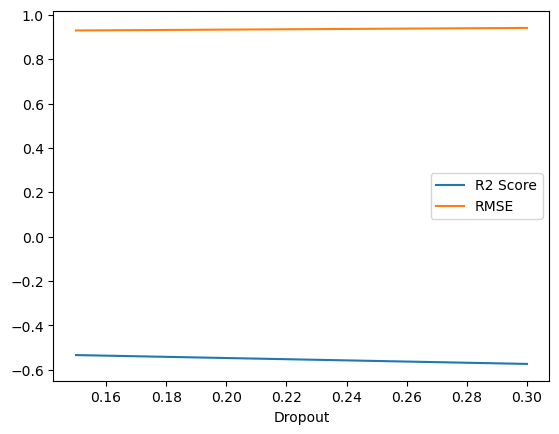

In [36]:
grouped_df.plot(x='Dropout', y=['R2 Score', 'RMSE'])

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

model = Sequential()

model.add(SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
model.add(Dropout(0.30))
model.add(SimpleRNN(100, activation='relu', return_sequences=True))
model.add(Dropout(0.30))
model.add(SimpleRNN(100, activation='relu', return_sequences=True))
model.add(Dropout(0.30))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=12, validation_data=(X_test, y_test), verbose=1, shuffle=False)

Epoch 1/50
8/8 [==============================] - 38s 2s/step - loss: 0.0532 - val_loss: 0.0620
Epoch 2/50
8/8 [==============================] - 1s 105ms/step - loss: 0.0406 - val_loss: 0.0374
Epoch 3/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0367 - val_loss: 0.0191
Epoch 4/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0365 - val_loss: 0.0118
Epoch 5/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0356 - val_loss: 0.0073
Epoch 6/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0353 - val_loss: 0.0058
Epoch 7/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0320 - val_loss: 0.0087
Epoch 8/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0309 - val_loss: 0.0072
Epoch 9/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0325 - val_loss: 0.0052
Epoch 10/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0319 - val_loss: 0.0041
Epoch 11/50
8/8 [============

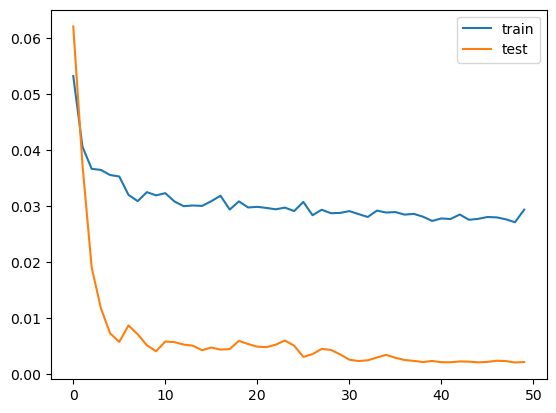

In [38]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [39]:
from math import sqrt
from numpy import concatenate
from numpy import reshape
from sklearn.metrics import mean_squared_error
# make a prediction
yhat = model.predict(X_test)
yhat = reshape(yhat, (len(yhat),1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
# invert scaling for forecast
yhat_inv = concatenate((yhat, X_test[:, 1:]), axis=1)
yhat_inv = scaler.inverse_transform(yhat_inv)
yhat_inv = yhat_inv[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
y_inv = concatenate((y_test, X_test[:, 1:]), axis=1)
y_inv = scaler.inverse_transform(y_inv)
y_inv = y_inv[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(y_inv, yhat_inv))
print('Test RMSE: %.3f' % rmse)

1/1 [==============================] - 1s 1s/step
Test RMSE: 0.834


In [40]:
r2 = r2_score(y_inv, yhat_inv)
r2

-0.20964166991253697

In [41]:
from numpy import reshape
reshape(yhat, (len(yhat),1))

array([[0.03859998],
       [0.04060052],
       [0.03891784],
       [0.04471728],
       [0.04794242],
       [0.03988922],
       [0.029354  ],
       [0.0447955 ],
       [0.11225388],
       [0.03099705],
       [0.11710454],
       [0.05097068],
       [0.00425667],
       [0.00466294],
       [0.01132479],
       [0.01773302],
       [0.02126942],
       [0.00223475],
       [0.00230464],
       [0.01750076],
       [0.02856685],
       [0.0049628 ],
       [0.00471915]], dtype=float32)

In [42]:
y_inv

array([1., 0., 0., 0., 1., 0., 0., 2., 0., 3., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [43]:
yhat_inv

array([0.65619971, 0.6902089 , 0.66160327, 0.76019379, 0.81502118,
       0.67811681, 0.49901807, 0.76152353, 1.90831599, 0.52694983,
       1.99077714, 0.86650158, 0.07236338, 0.07927005, 0.19252148,
       0.30146126, 0.36158011, 0.03799074, 0.03917887, 0.29751295,
       0.48563652, 0.08436766, 0.08022551])

In [44]:
yhat_inv_rounded = [max((round(x)), 0) for x in yhat_inv]
yhat_inv_rounded

[1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [45]:
rmse_rounded = sqrt(mean_squared_error(y_inv, yhat_inv_rounded))
print('Test RMSE: %.3f' % rmse_rounded)

Test RMSE: 0.808


In [46]:
from math import ceil
yhat_inv_ceiled = [max((ceil(x)), 0) for x in yhat_inv]
yhat_inv_ceiled

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [47]:
rmse_ceiled = sqrt(mean_squared_error(y_inv, yhat_inv_ceiled))
print('Test RMSE: %.3f' % rmse_ceiled)

Test RMSE: 1.083


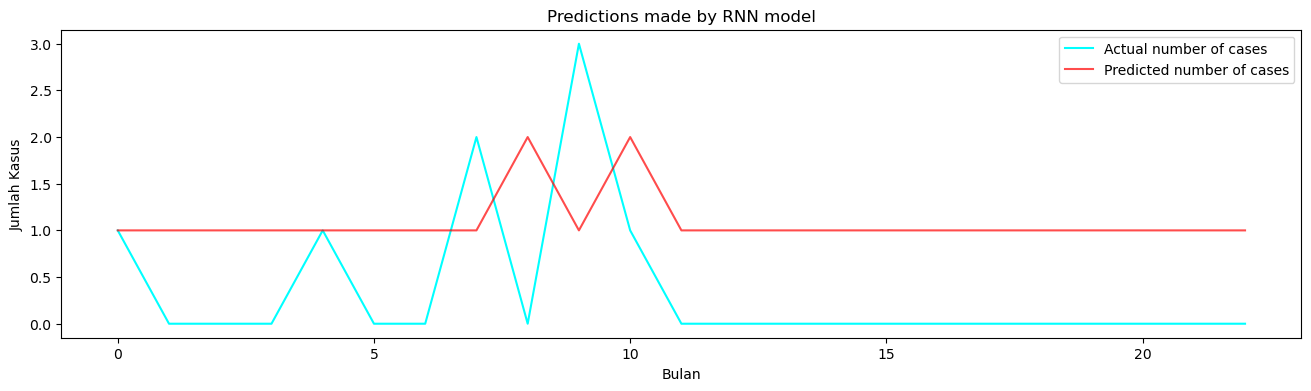

In [61]:
# compare the actual values vs predicted values by plotting a graph

def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16, 4))
    plt.plot(test, color='cyan', label='Actual number of cases')
    plt.plot(predicted, alpha=0.7, color='red', label='Predicted number of cases')
    plt.title(title)
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Kasus')
    plt.legend()
    plt.show()
plot_predictions(y_inv, yhat_inv_ceiled, "Predictions made by RNN model")

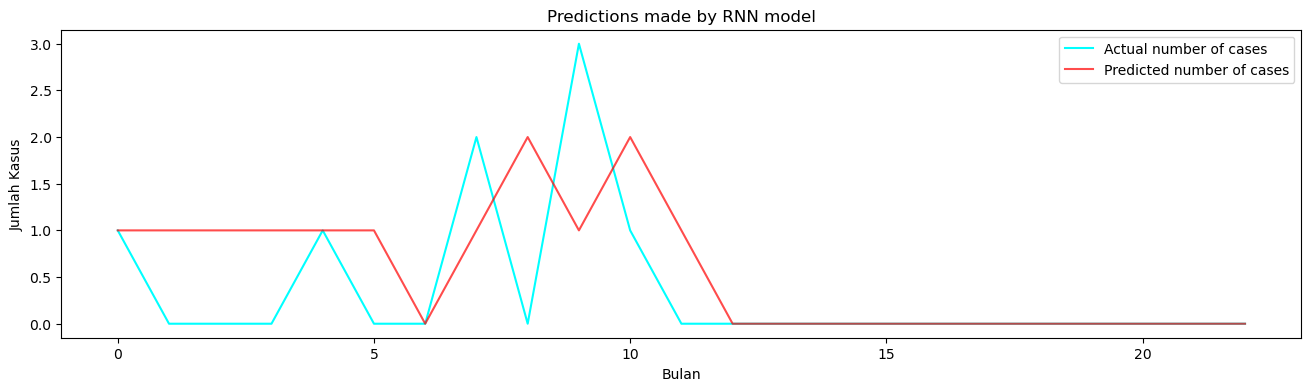

In [62]:
plot_predictions(y_inv, yhat_inv_rounded, "Predictions made by RNN model")

# Peramalan Periode Tahun 2023
Menggunakan data jumlah penderita hasil peramalan 1 periode sebelumnya dan rata-rata bulan yang sama pada tahun-tahun sebelumnya untuk variabel independen lainnya sebagai input.

In [50]:
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
scaled_df['month'] = scaled_df.index.month
scaled_df

,Jumlah Penderita,Cakupan DPT1 %,Cakupan DPT2 %,Cakupan DPT3 %,Cakupan DPT4 %,Kepadatan Penduduk (jiwa/km2),month
Bulan/Th,,,,,,,
2013-01-01,0.941176,0.183417,0.181208,0.109756,0.000000,0.000000,1
2013-02-01,0.529412,0.085427,0.114094,0.094851,0.000000,0.010034,2
2013-03-01,0.294118,0.091709,0.184564,0.170732,0.000000,0.020072,3
2013-04-01,0.294118,0.134422,0.169463,0.162602,0.000000,0.030115,4
2013-05-01,0.352941,0.016332,0.000000,0.016260,0.000000,0.040163,5
...,...,...,...,...,...,...,...
2022-08-01,0.000000,0.416297,0.531961,0.368951,0.297354,0.971292,8
2022-09-01,0.000000,0.367574,0.522694,0.342605,0.176722,0.976512,9
2022-10-01,0.000000,0.368392,0.475718,0.372846,0.142265,0.984341,10


In [51]:
df_grouped = scaled_df.groupby(['month']).mean()
date_range = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
df_grouped.set_index(date_range, inplace=True)
df_grouped

,Jumlah Penderita,Cakupan DPT1 %,Cakupan DPT2 %,Cakupan DPT3 %,Cakupan DPT4 %,Kepadatan Penduduk (jiwa/km2)
2023-01-01,0.294118,0.203826,0.219798,0.187130,0.083419,0.459601
2023-02-01,0.200000,0.165225,0.239905,0.165262,0.294538,0.468981
2023-03-01,0.170588,0.191778,0.307367,0.240742,0.166981,0.477841
2023-04-01,0.182353,0.241496,0.329251,0.276765,0.096761,0.486442
2023-05-01,0.170588,0.195928,0.264636,0.205970,0.081007,0.494784
2023-06-01,0.088235,0.216315,0.260344,0.216987,0.078760,0.502607
2023-07-01,0.117647,0.244363,0.295183,0.227141,0.149940,0.510431
2023-08-01,0.147059,0.312286,0.394033,0.267244,0.106551,0.517996
2023-09-01,0.170588,0.270999,0.397222,0.260671,0.067268,0.525563
2023-10-01,0.141176,0.247611,0.328332,0.264328,0.058002,0.533393


In [52]:
df_2023 = pd.DataFrame(index=pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS'), columns=['Jumlah Penderita (t-1)', 'Rata-rata Cakupan DPT1 %', 'Rata-rata Cakupan DPT2 %', 'Rata-rata Cakupan DPT3 %', 'Rata-rata Cakupan DPT4 %', 'Rata-rata Kepadatan Penduduk (jiwa/km2)', 'Jumlah Penderita (t)'])
df_2023.iloc[0,0] = float(0)
df_2023['Rata-rata Cakupan DPT1 %'] = df_grouped['Cakupan DPT1 %']
df_2023['Rata-rata Cakupan DPT2 %'] = df_grouped['Cakupan DPT2 %']
df_2023['Rata-rata Cakupan DPT3 %'] = df_grouped['Cakupan DPT3 %']
df_2023['Rata-rata Cakupan DPT4 %'] = df_grouped['Cakupan DPT4 %']
df_2023['Rata-rata Kepadatan Penduduk (jiwa/km2)'] = df_grouped['Kepadatan Penduduk (jiwa/km2)']
df_2023 = df_2023.astype('float64')
df_2023


,Jumlah Penderita (t-1),Rata-rata Cakupan DPT1 %,Rata-rata Cakupan DPT2 %,Rata-rata Cakupan DPT3 %,Rata-rata Cakupan DPT4 %,Rata-rata Kepadatan Penduduk (jiwa/km2),Jumlah Penderita (t)
2023-01-01,0.0,0.203826,0.219798,0.187130,0.083419,0.459601,NaN
2023-02-01,NaN,0.165225,0.239905,0.165262,0.294538,0.468981,NaN
2023-03-01,NaN,0.191778,0.307367,0.240742,0.166981,0.477841,NaN
2023-04-01,NaN,0.241496,0.329251,0.276765,0.096761,0.486442,NaN
2023-05-01,NaN,0.195928,0.264636,0.205970,0.081007,0.494784,NaN
2023-06-01,NaN,0.216315,0.260344,0.216987,0.078760,0.502607,NaN
2023-07-01,NaN,0.244363,0.295183,0.227141,0.149940,0.510431,NaN
2023-08-01,NaN,0.312286,0.394033,0.267244,0.106551,0.517996,NaN
2023-09-01,NaN,0.270999,0.397222,0.260671,0.067268,0.525563,NaN
2023-10-01,NaN,0.247611,0.328332,0.264328,0.058002,0.533393,NaN


In [53]:
# Create an empty list to store the forecasts
forecasts = []

# Generate forecasts for the desired number of periods
for i in range(12):
    input_data = df_2023.values[i, :-1]
    # Reshape the input sequence to match the model's input shape
    input_data = np.reshape(input_data, (1, 1, 6))

    # Make a forecast for the next period
    forecast = model.predict(input_data)

    # Append the forecasted value to the list of forecasts
    forecasts.append(forecast[0][0])
    df_2023.iloc[i, -1] = forecast
    if i != 11:
        df_2023.iloc[i+1, 0] = forecast

# Print the forecasts
print(forecasts)

1/1 [==============================] - 0s 57ms/step
[array([0.14347355], dtype=float32), array([0.14108208], dtype=float32), array([0.16343078], dtype=float32), array([0.17640239], dtype=float32), array([0.17325684], dtype=float32), array([0.17395133], dtype=float32), array([0.16865328], dtype=float32), array([0.17589864], dtype=float32), array([0.18066877], dtype=float32), array([0.18045956], dtype=float32), array([0.17868099], dtype=float32), array([0.17246437], dtype=float32)]


In [54]:
df_2023

,Jumlah Penderita (t-1),Rata-rata Cakupan DPT1 %,Rata-rata Cakupan DPT2 %,Rata-rata Cakupan DPT3 %,Rata-rata Cakupan DPT4 %,Rata-rata Kepadatan Penduduk (jiwa/km2),Jumlah Penderita (t)
2023-01-01,0.000000,0.203826,0.219798,0.187130,0.083419,0.459601,0.143474
2023-02-01,0.143474,0.165225,0.239905,0.165262,0.294538,0.468981,0.141082
2023-03-01,0.141082,0.191778,0.307367,0.240742,0.166981,0.477841,0.163431
2023-04-01,0.163431,0.241496,0.329251,0.276765,0.096761,0.486442,0.176402
2023-05-01,0.176402,0.195928,0.264636,0.205970,0.081007,0.494784,0.173257
2023-06-01,0.173257,0.216315,0.260344,0.216987,0.078760,0.502607,0.173951
2023-07-01,0.173951,0.244363,0.295183,0.227141,0.149940,0.510431,0.168653
2023-08-01,0.168653,0.312286,0.394033,0.267244,0.106551,0.517996,0.175899
2023-09-01,0.175899,0.270999,0.397222,0.260671,0.067268,0.525563,0.180669
2023-10-01,0.180669,0.247611,0.328332,0.264328,0.058002,0.533393,0.180460


In [55]:
# Inverse
df_2023['Jumlah Penderita (t-1)'] = df_2023['Jumlah Penderita (t-1)'] * 17
df_2023['Jumlah Penderita (t)'] = df_2023['Jumlah Penderita (t)'] * 17 

df_2023

,Jumlah Penderita (t-1),Rata-rata Cakupan DPT1 %,Rata-rata Cakupan DPT2 %,Rata-rata Cakupan DPT3 %,Rata-rata Cakupan DPT4 %,Rata-rata Kepadatan Penduduk (jiwa/km2),Jumlah Penderita (t)
2023-01-01,0.000000,0.203826,0.219798,0.187130,0.083419,0.459601,2.439050
2023-02-01,2.439050,0.165225,0.239905,0.165262,0.294538,0.468981,2.398395
2023-03-01,2.398395,0.191778,0.307367,0.240742,0.166981,0.477841,2.778323
2023-04-01,2.778323,0.241496,0.329251,0.276765,0.096761,0.486442,2.998841
2023-05-01,2.998841,0.195928,0.264636,0.205970,0.081007,0.494784,2.945366
2023-06-01,2.945366,0.216315,0.260344,0.216987,0.078760,0.502607,2.957173
2023-07-01,2.957173,0.244363,0.295183,0.227141,0.149940,0.510431,2.867106
2023-08-01,2.867106,0.312286,0.394033,0.267244,0.106551,0.517996,2.990277
2023-09-01,2.990277,0.270999,0.397222,0.260671,0.067268,0.525563,3.071369
2023-10-01,3.071369,0.247611,0.328332,0.264328,0.058002,0.533393,3.067813


In [56]:
df_2023['Jumlah Penderita (t-1)'] = [max((ceil(x)), 0) for x in df_2023['Jumlah Penderita (t-1)']]       
df_2023['Jumlah Penderita (t)'] = [max((ceil(x)), 0) for x in df_2023['Jumlah Penderita (t)']] 
df_2023

,Jumlah Penderita (t-1),Rata-rata Cakupan DPT1 %,Rata-rata Cakupan DPT2 %,Rata-rata Cakupan DPT3 %,Rata-rata Cakupan DPT4 %,Rata-rata Kepadatan Penduduk (jiwa/km2),Jumlah Penderita (t)
2023-01-01,0,0.203826,0.219798,0.187130,0.083419,0.459601,3
2023-02-01,3,0.165225,0.239905,0.165262,0.294538,0.468981,3
2023-03-01,3,0.191778,0.307367,0.240742,0.166981,0.477841,3
2023-04-01,3,0.241496,0.329251,0.276765,0.096761,0.486442,3
2023-05-01,3,0.195928,0.264636,0.205970,0.081007,0.494784,3
2023-06-01,3,0.216315,0.260344,0.216987,0.078760,0.502607,3
2023-07-01,3,0.244363,0.295183,0.227141,0.149940,0.510431,3
2023-08-01,3,0.312286,0.394033,0.267244,0.106551,0.517996,3
2023-09-01,3,0.270999,0.397222,0.260671,0.067268,0.525563,4
2023-10-01,4,0.247611,0.328332,0.264328,0.058002,0.533393,4


In [57]:
# Prediction Test
range = pd.date_range (start='2021-02-01', end='2022-12-01', freq='MS')
prediction_test = pd.DataFrame(yhat_inv_ceiled, index=range, columns=['Jumlah Penderita'])
prediction_test

,Jumlah Penderita
2021-02-01,1
2021-03-01,1
2021-04-01,1
2021-05-01,1
2021-06-01,1
2021-07-01,1
2021-08-01,1
2021-09-01,1
2021-10-01,2
2021-11-01,1


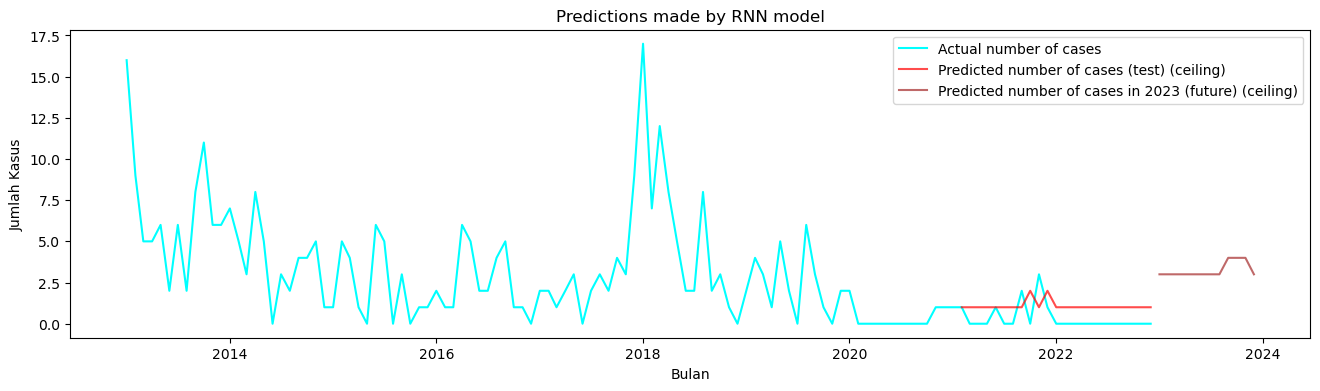

In [60]:

def plot_predictions(actual, prediction_test, future_forecast, title):
    plt.figure(figsize=(16, 4))
    plt.plot(actual, color='cyan', label='Actual number of cases')
    plt.plot(prediction_test, alpha=0.7, color='red', label='Predicted number of cases (test) (ceiling)')
    plt.plot(future_forecast, alpha=0.7, color='brown', label='Predicted number of cases in 2023 (future) (ceiling)')
    plt.title(title)
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Kasus')
    plt.legend()
    plt.show()
plot_predictions(df['Jumlah Penderita'], prediction_test, df_2023['Jumlah Penderita (t)'], "Predictions made by RNN model")